In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance_data.csv to insurance_data.csv


--- Linear Regression Results ---
Mean Squared Error (MSE): 33596915.85
R2 Score: 0.7836


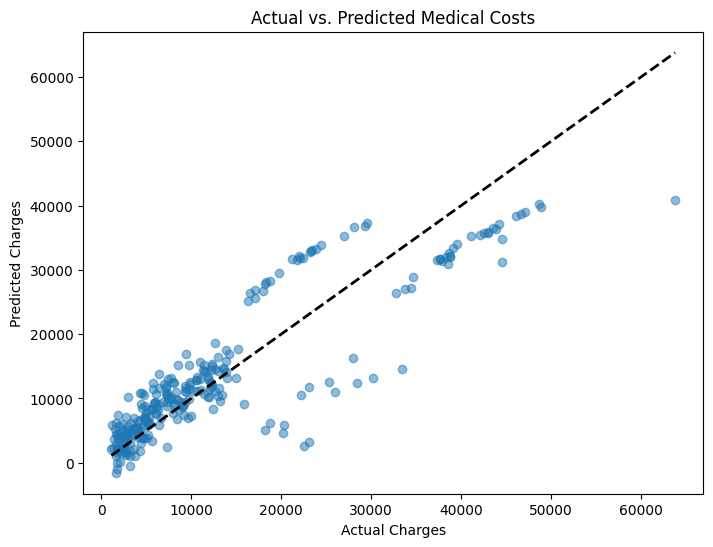

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('insurance_data.csv')

df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Medical Costs")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Diagonal line
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_uci.csv to heart_disease_uci.csv


DataFrame columns: Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
--- Logistic Regression Results ---
Accuracy: 0.5598

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.88      0.77        75
           1       0.49      0.56      0.52        54
           2       0.25      0.08      0.12        25
           3       0.29      0.19      0.23        26
           4       0.00      0.00      0.00         4

    accuracy                           0.56       184
   macro avg       0.34      0.34      0.33       184
weighted avg       0.50      0.56      0.52       184



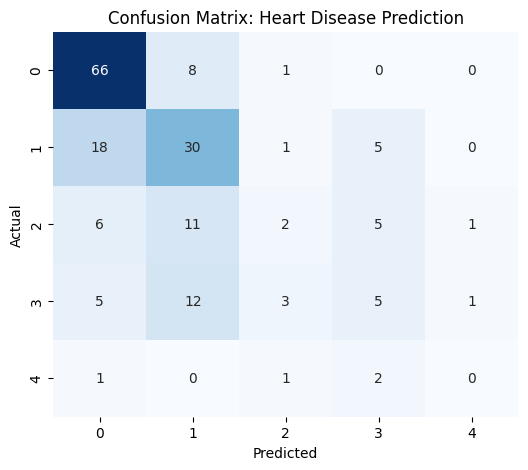

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('heart_disease_uci.csv')

# Print columns to identify the correct target variable
print("DataFrame columns:", df.columns)

# Assuming 'target' is the intended column name, but it might be 'num' or another similar name.
# Please replace 'target' with the correct column name identified from the print statement above.

# Identify categorical columns for encoding
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
# Exclude 'num' if it's in categorical_cols as it's the target
if 'num' in categorical_cols:
    categorical_cols.remove('num')

# Convert boolean columns to int (True=1, False=0) for consistency before get_dummies
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

# Apply one-hot encoding to categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

# Handle missing values by imputing with the mean
X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

print("--- Logistic Regression Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- 6. VISUALIZATION (Confusion Matrix) ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Heart Disease Prediction')
plt.show()

In [ ]:
# --- HYPERPARAMETER TUNING: LOGISTIC REGRESSION ---
from sklearn.model_selection import GridSearchCV

# 1. Define the model and parameter grid
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

# 'C' controls complexity (Low C = Simple model, High C = Complex model)
# 'penalty' controls the type of regularization (L1 or L2)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# 2. Setup Grid Search
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# 3. Fit search to training data
grid_search.fit(X_train, y_train)

# 4. Get best results
best_log_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# 5. Evaluate the TUNED model on Test Set
y_pred_tuned = best_log_model.predict(X_test)
tuned_acc = accuracy_score(y_test, y_pred_tuned)
print(f"Test Set Accuracy (After Tuning): {tuned_acc:.4f}")

Best Hyperparameters: {'C': 10, 'penalty': 'l1'}
Best Cross-Validation Accuracy: 0.6155
Test Set Accuracy (After Tuning): 0.5326
